# Ocean ONE STEP eddy tracking

The objective of this script is to track the eddies in the Ocean.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Output data path
outputpath='/g/data/v45/jm5970/model_output/mom/mom025_gfdl_nyf_1080/output000/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'ocean_daily.nc')
ssh=ncfile.variables['sea_level'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean'][:]
lat=ncfile.variables['yt_ocean'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/g/data1/v45/APE-MOM/gfdl_nyf_1080_SH/mean_ssh.nc')
ssh_mean=squeeze(ncfile.variables['sea_level'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean'][:]
lat=ncfile.variables['yt_ocean'][:]
#ssh_mean=mean(ssh,axis=0)

(<matplotlib.figure.Figure at 0x7fc0cc60c690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc0cc60cc90>)

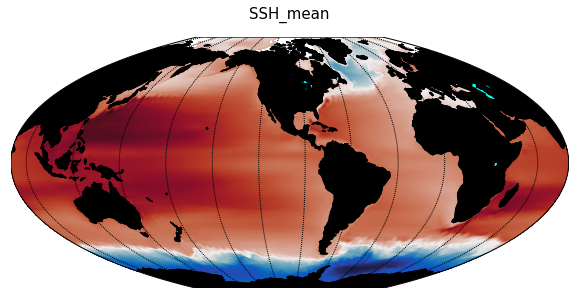

In [4]:
#basemap_mplot(lon,lat[0:450],ssh_mean[0:450,:],title="SSH_mean",scale='Lin',cmap=cm.cm.balance\
#              ,vmin='',vmax='',xan=1,yan=1,figsize=(5,5),fontsize=15)

basemap_mplot(lon,lat,ssh_mean,title="SSH_mean",projection='mbtfpq',lat_0=-90,lon_0=-100,\
              resolution='c',scale='Lin',vmin='',vmax='',cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(10,5),fontsize=15)

In [5]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(ssh[0,:,:])

## Analysis in just one level  

To extract or analyse the data in just one time step use the following two examples:

* **Possitive eddy tracking**
* **Negative eddy tracking**


#### Possitive eddy tracking

In [6]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])
#Levels to Analyse, note that one of them is an extreme value,
#This is because we don't want interference from any other contour.
# If you want to Analyse multiple levels, please go to the Moving in Z section.
levels=[10,500]
for ii in range(0,1):
    ssha=ssh[ii,:,:]-ssh_mean
    eddys=scan_eddym(ssha,lon,lat,levels,ii,areamap,mask=mask,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

Total of contours was: 47 - Total of eddies: 7 - Level: 10.0   

#### Negative eddy tracking

In [7]:
levels=[-500,-20]
for ii in range(0,1):
    ssha=ssh[ii,:,:]-ssh_mean
    eddys=scan_eddym(ssha,lon,lat,levels,ii,areamap,mask=mask,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytdn=dict_eddyt(ii,eddys)
    else:
        eddytdn=dict_eddyt(ii,eddys,eddytdn) 

Total of contours was: 74 - Total of eddies: 6 - Level: -20.0   

### Removing eddies from eddy field or any other variable.

In [8]:
#This threshold will let you grow the domine around the eddy contour.
threshold=1
# Function that removes the eddies
## Positive remotion
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


In [9]:
## Negative remotion
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


### Ploting removed data in beautiful maps

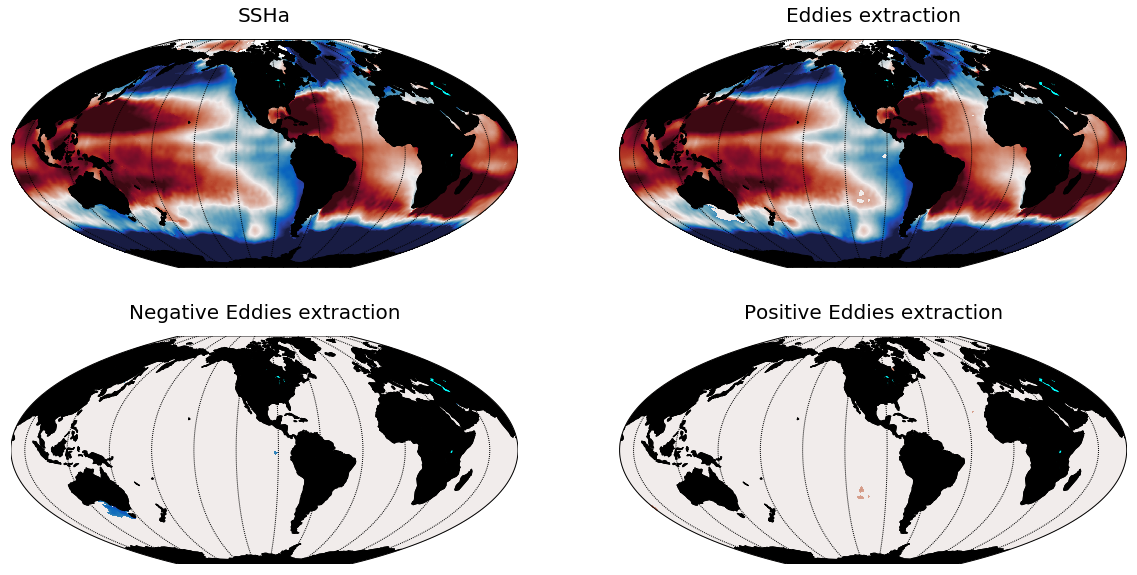

In [10]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],projection='mbtfpq',scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,10),fontsize=20);

# Analysis of eddies scanning in Z

In [11]:
eddytd=analyseddyzt(ssh,lon,lat,0,1,1,20,1,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100.0% Time Elapsed: 48.0 s  

In [12]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


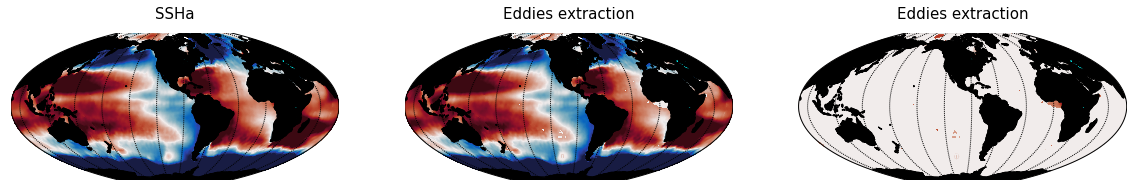

In [13]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot,eddysplot]\
              ,title=["SSHa","Eddies extraction","Eddies extraction",
                       "Positive Eddies extraction"],projection='mbtfpq',scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,5),fontsize=15);

In [14]:
eddytdn=analyseddyzt(ssh,lon,lat,0,1,1,-1,-20,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100.0% Time Elapsed: 50.0 s  

In [15]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


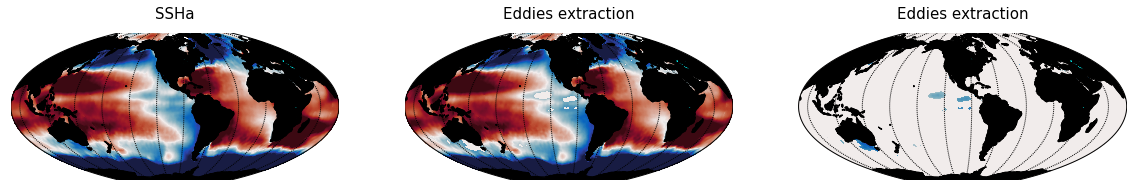

In [16]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplotn,eddysplotn]\
              ,title=["SSHa","Eddies extraction","Eddies extraction",
                       "Positive Eddies extraction"],projection='mbtfpq',scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,5),fontsize=15);

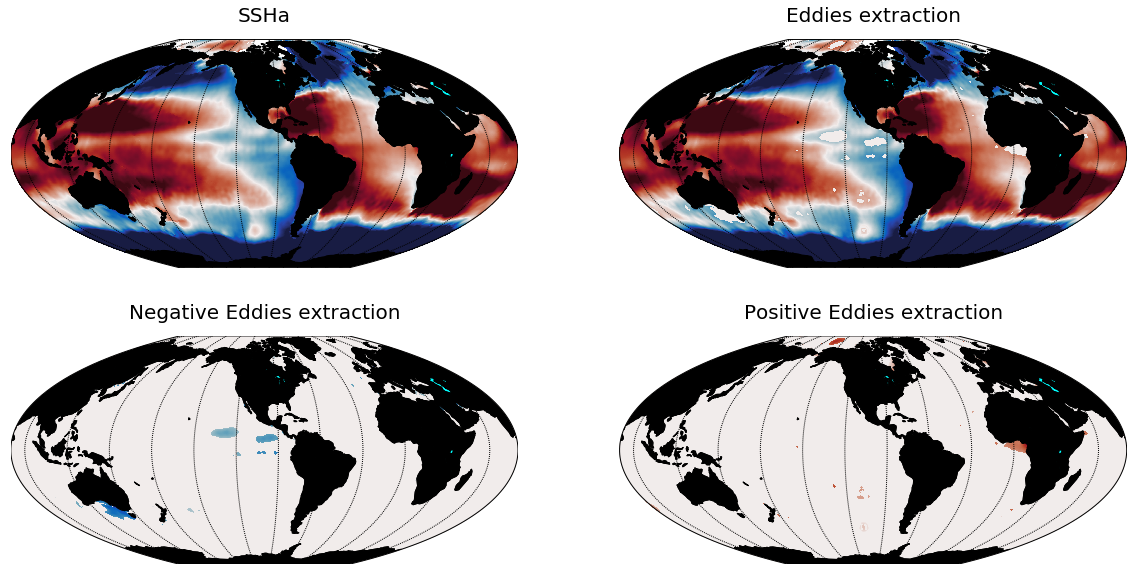

In [17]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],projection='mbtfpq',scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,10),fontsize=20);